In [2]:
import sys
import os
import numpy as np
import matplotlib.pyplot as plt

import torch
import torchvision 
import torch.nn as nn
from torchvision import utils

sys.path.append('../')
#from pytvision import visualization as view

plt.ion() # interactive mode
%matplotlib inline

In [3]:
alexnet = torchvision.models.alexnet(pretrained=True)
alexnet

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Dropout(p=0.5)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
    (2): ReLU(inplace)
    (3): Dropout(p=0.5)
    (4): Linear(in_features=4096, out_feature

In [46]:
def vistensor(tensor, ch=0, allkernels=False, nrow=8, padding=1, brgb=True): 
    """
    vistensor: visuzlization tensor
        @ch: visualization channel 
        @allkernels: visualization all tensores
    """        
    n,c,w,h = tensor.shape
    if allkernels: tensor = tensor.view(n*c,-1,w,h )
    elif brgb:
        tensor = tensor[:,ch:(ch+3),:,:]
    else: 
        tensor = tensor[:,ch,:,:].unsqueeze(dim=1)
        
    rows = np.min( (tensor.shape[0]//nrow + 1, 64 )  )    
    grid = utils.make_grid(tensor, nrow=nrow, normalize=True, padding=padding)
    plt.figure( figsize=(nrow,rows) )
    plt.imshow(grid.numpy().transpose((1, 2, 0)))
    

torch.Size([64, 3, 11, 11])


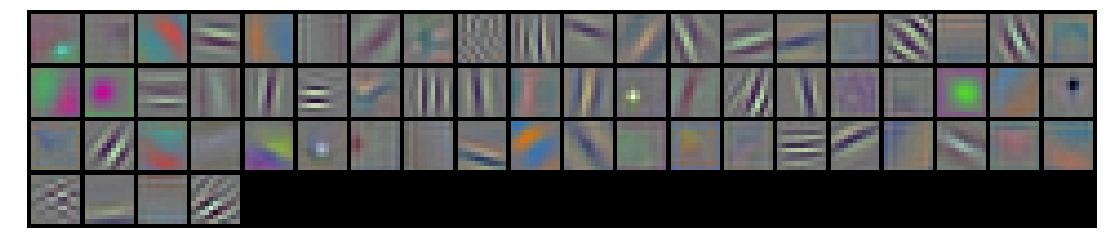

In [49]:
kernel = alexnet.features[0].weight.data.clone()
print(kernel.shape)

vistensor(kernel, ch=0, allkernels=False, nrow=20, brgb=True )
#savetensor(kernel,'kernel.png', allkernels=False)

plt.axis('off')
plt.ioff()
plt.show()

2 torch.Size([64, 3, 11, 11])


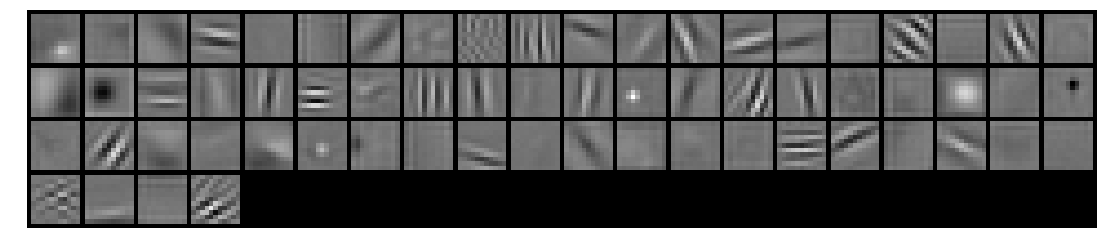

5 torch.Size([192, 64, 5, 5])


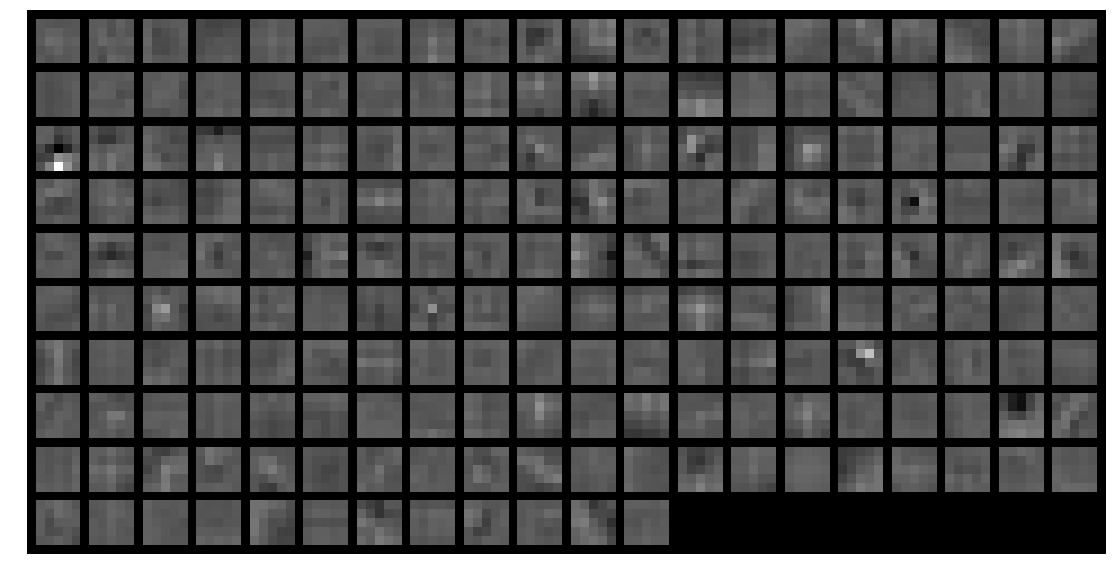

8 torch.Size([384, 192, 3, 3])


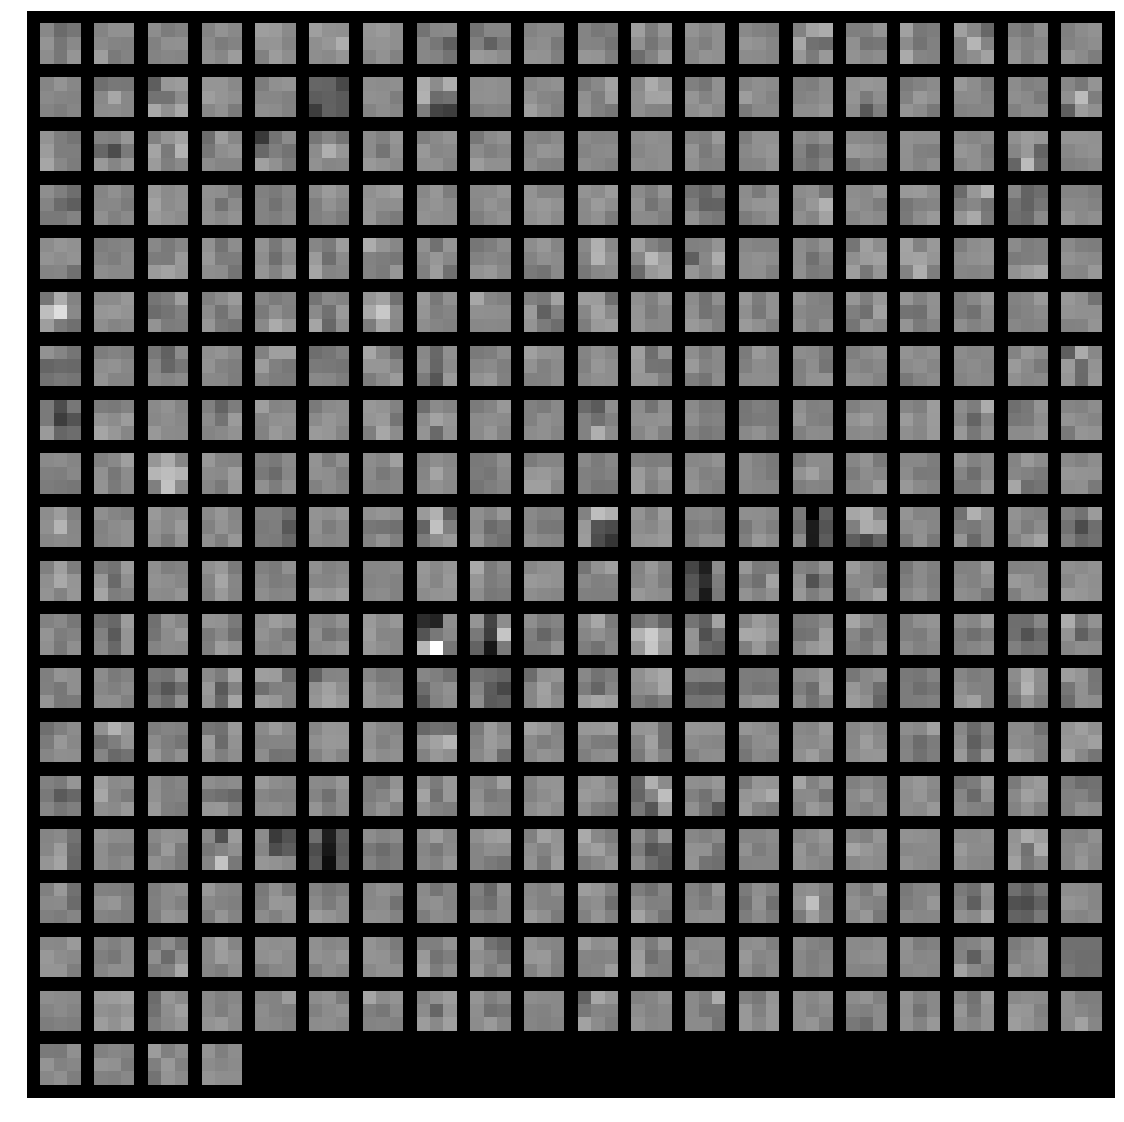

10 torch.Size([256, 384, 3, 3])


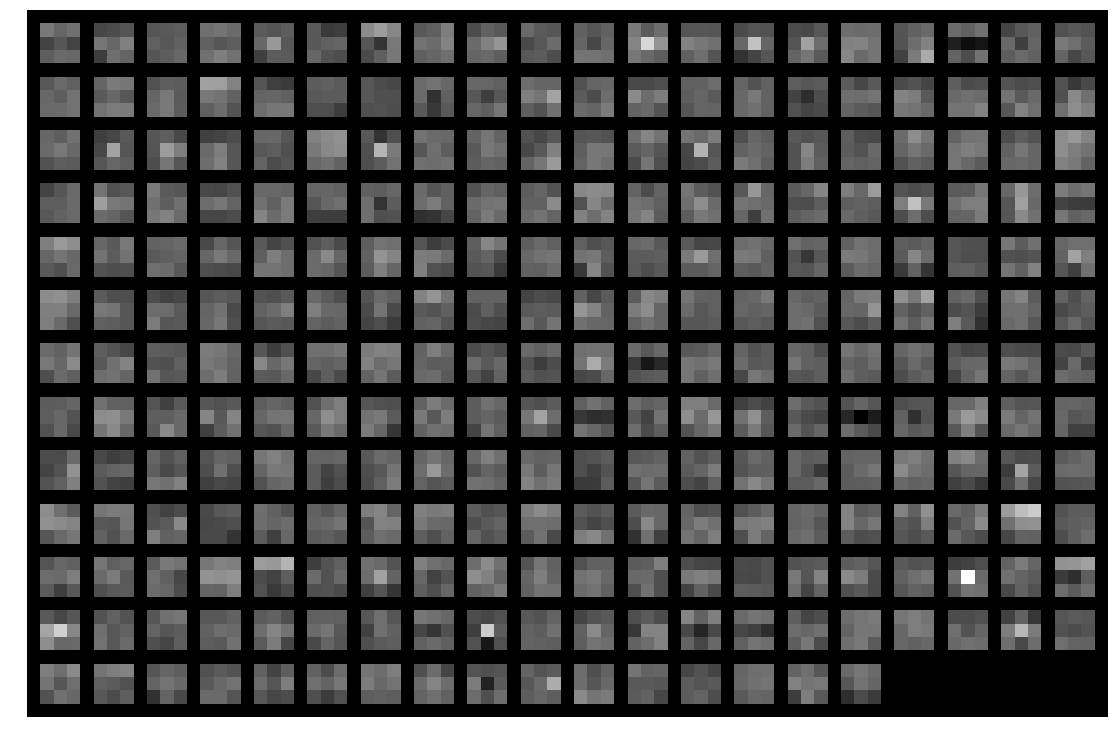

12 torch.Size([256, 256, 3, 3])


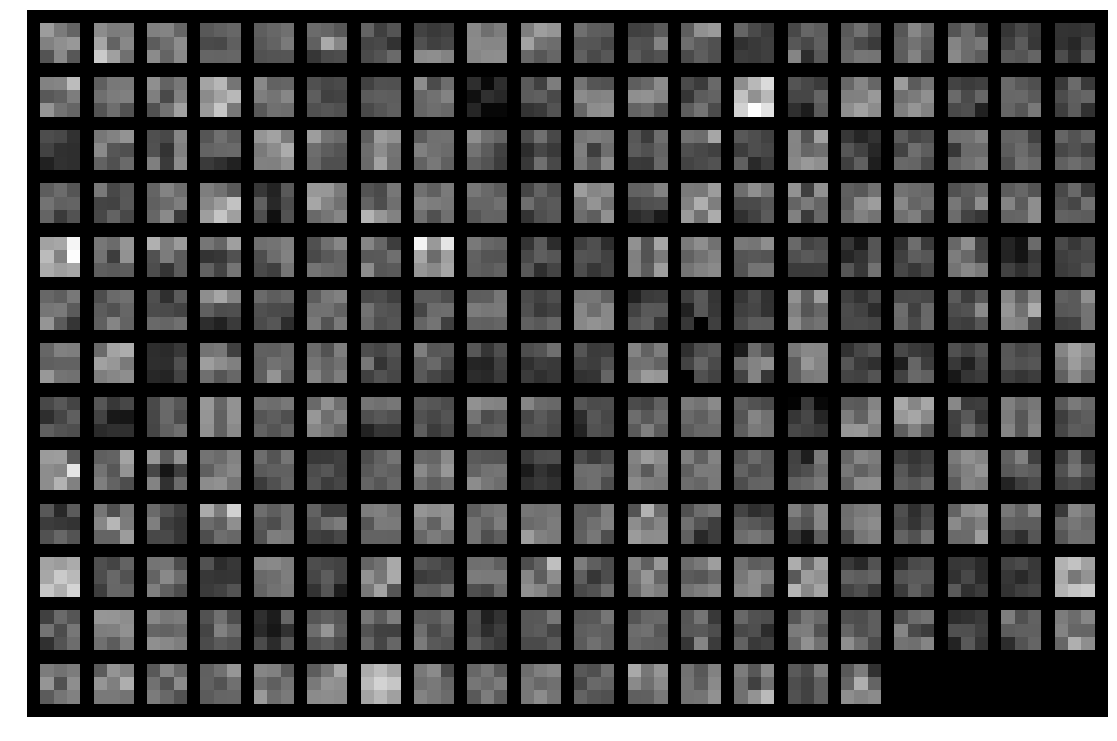

In [73]:
k=0
for i,m in enumerate( alexnet.modules() ): 
    if isinstance(m, nn.Conv2d):  
        print(i, m.weight.shape )
        kernel = m.weight.data.clone()        
        vistensor(kernel, ch=1, allkernels=False, nrow=20, brgb=False )
        plt.axis('off')
        plt.ioff()
        plt.show()        
        k+=1 
    
    #if k==2: break


In [70]:
def hist(tensor):
    
    #n,c,h,w = tensor.shape    
    tensor = tensor.view(-1)
    data = tensor.numpy()
    
    # normalize
    #data -= data.min()
    #data /= data.max()
    #data  = (data*255).astype(int)
        
    num_bins = 100
    n, bins, patches = plt.hist(data, num_bins, normed=1, facecolor='blue', alpha=0.5)
   
    

2 Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2)) torch.Size([64, 3, 11, 11])


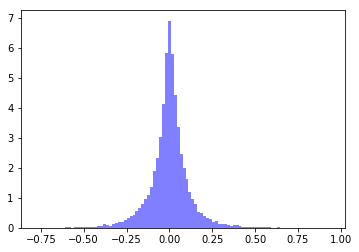

5 Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2)) torch.Size([192, 64, 5, 5])


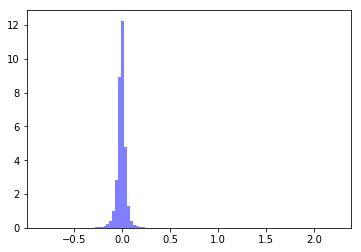

8 Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)) torch.Size([384, 192, 3, 3])


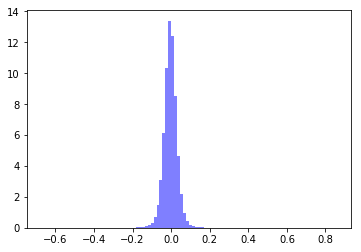

10 Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)) torch.Size([256, 384, 3, 3])


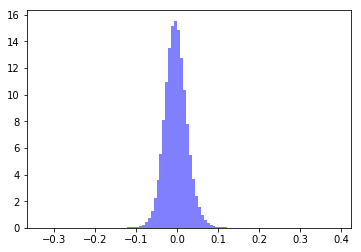

12 Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)) torch.Size([256, 256, 3, 3])


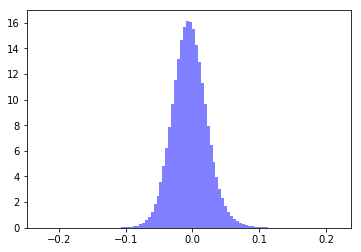

In [71]:
k=0
for i,m in enumerate( alexnet.modules() ): 
    if isinstance(m, nn.Conv2d):  
        print(i, m, m.weight.shape )
        kernel = m.weight.data.clone()        
        hist(kernel)       
        plt.subplots_adjust(left=0.15)
        #plt.axis('off')
        #plt.ioff()
        plt.show()        
        k+=1 
    
    #if k==2: break